In [ ]:
#from google.colab import drive
#drive.flush_and_unmount()

In [ ]:
!pip install pycaret

In [ ]:
import pandas as pd
from pycaret.clustering import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = './drive/MyDrive/BADS7105/Supermarket Data.csv' 

In [ ]:
df = pd.read_csv(data)

In [ ]:
df['SHOP_DATE'] = df['SHOP_DATE'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [ ]:
df.tail(5)

SHOP_WEEK  SHOP_DATE  SHOP_WEEKDAY  SHOP_HOUR  QUANTITY  SPEND  \
956569     200617 2006-06-22             5         12         3   3.96   
956570     200633 2006-10-13             6         20         3   3.96   
956571     200617 2006-06-22             5         18         3   3.96   
956572     200619 2006-07-06             5         19         3   3.96   
956573     200635 2006-10-23             2         21         3   3.96   

         PROD_CODE PROD_CODE_10 PROD_CODE_20 PROD_CODE_30 PROD_CODE_40  \
956569  PRD0904997      CL00074     DEP00021       G00007       D00002   
956570  PRD0904997      CL00074     DEP00021       G00007       D00002   
956571  PRD0904997      CL00074     DEP00021       G00007       D00002   
956572  PRD0904997      CL00074     DEP00021       G00007       D00002   
956573  PRD0904997      CL00074     DEP00021       G00007       D00002   

             CUST_CODE CUST_PRICE_SENSITIVITY CUST_LIFESTAGE        BASKET_ID  \
956569             NaN                    NaN            NaN  994101100088778   
956570             NaN                    NaN            NaN  994102700099738   
956571  CUST0000544241                     LA             YA  994101100506174   
956572  CUST0000423155                     LA             YF  994101300433650   
956573             NaN                    NaN            NaN  994102900104676   

       BASKET_SIZE BASKET_PRICE_SENSITIVITY BASKET_TYPE  \
956569           M                       MM      Top Up   
956570           L                       LA      Top Up   
956571           L                       LA      Top Up   
956572           L                       LA   Full Shop   
956573           L                       MM      Top Up   

       BASKET_DOMINANT_MISSION  STORE_CODE STORE_FORMAT STORE_REGION  
956569                   Fresh  STORE00002           LS          W01  
956570                   Fresh  STORE00002           LS          W01  
956571                   Fresh  STORE00002           LS          W01  
956572                   Fresh  STORE00002           LS          W01  
956573                   Fresh  STORE00002           LS          W01

### **Prepare customer single view**


# Define features





Total visits = COUNT(DISTINCT BASKET ID)

Ticket size = SUM(SPEND)/COUNT(DISTINCT BASKET ID)

Total no. of SKUs


# Calculate features

In [ ]:
df['CUST_LIFESTAGE'].replace(to_replace=['OA','OF','OT','PE','YA','YF'], value=[1,2,3,4,5,6], inplace=True)
df['BASKET_TYPE'].replace(to_replace=['Top Up','Full Shop','Small Shop','XX'], value=[1,2,3,0], inplace=True)
df['BASKET_DOMINANT_MISSION'].replace(to_replace=['Grocery','Fresh','Mixed','Nonfood','XX'],value =[1,2,3,4,0],inplace=True)

In [ ]:
df.tail(5)

SHOP_WEEK  SHOP_DATE  SHOP_WEEKDAY  SHOP_HOUR  QUANTITY  SPEND  \
956569     200617 2006-06-22             5         12         3   3.96   
956570     200633 2006-10-13             6         20         3   3.96   
956571     200617 2006-06-22             5         18         3   3.96   
956572     200619 2006-07-06             5         19         3   3.96   
956573     200635 2006-10-23             2         21         3   3.96   

         PROD_CODE PROD_CODE_10 PROD_CODE_20 PROD_CODE_30 PROD_CODE_40  \
956569  PRD0904997      CL00074     DEP00021       G00007       D00002   
956570  PRD0904997      CL00074     DEP00021       G00007       D00002   
956571  PRD0904997      CL00074     DEP00021       G00007       D00002   
956572  PRD0904997      CL00074     DEP00021       G00007       D00002   
956573  PRD0904997      CL00074     DEP00021       G00007       D00002   

             CUST_CODE CUST_PRICE_SENSITIVITY  CUST_LIFESTAGE  \
956569             NaN                    NaN             NaN   
956570             NaN                    NaN             NaN   
956571  CUST0000544241                     LA             5.0   
956572  CUST0000423155                     LA             6.0   
956573             NaN                    NaN             NaN   

              BASKET_ID BASKET_SIZE BASKET_PRICE_SENSITIVITY  BASKET_TYPE  \
956569  994101100088778           M                       MM            1   
956570  994102700099738           L                       LA            1   
956571  994101100506174           L                       LA            1   
956572  994101300433650           L                       LA            2   
956573  994102900104676           L                       MM            1   

        BASKET_DOMINANT_MISSION  STORE_CODE STORE_FORMAT STORE_REGION  
956569                        2  STORE00002           LS          W01  
956570                        2  STORE00002           LS          W01  
956571                        2  STORE00002           LS          W01  
956572                        2  STORE00002           LS          W01  
956573                        2  STORE00002           LS          W01

In [ ]:
##prepare customer single view
df_csv =  df[df['CUST_CODE'].notnull()].groupby(by=['CUST_CODE']).agg(TotalSpend=('SPEND', 'sum'),
                                                                                  TotalVisits=('BASKET_ID', 'nunique'),
                                                                                  TotalSKUs=('PROD_CODE', 'nunique'),
                                                                                  FirstDate=('SHOP_DATE', 'min'),
                                                                                  LastDate=('SHOP_DATE', 'max'),
                                                                                  ).reset_index()

In [ ]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6100 entries, 0 to 6099
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CUST_CODE    6100 non-null   object        
 1   TotalSpend   6100 non-null   float64       
 2   TotalVisits  6100 non-null   int64         
 3   TotalSKUs    6100 non-null   int64         
 4   FirstDate    6100 non-null   datetime64[ns]
 5   LastDate     6100 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 286.1+ KB


In [ ]:
##calculate ticket size
df_csv['TicketSize'] = df_csv['TotalSpend']/df_csv['TotalVisits']

In [ ]:
##find max date in the dataset
max_date = df_csv['LastDate'].max()

In [ ]:
##calculate total days of the relationship or age of the customer
df_csv['total_days'] = (df_csv['LastDate'] - df_csv['FirstDate']).dt.days + 1

In [ ]:
df_csv['month'] = round(df_csv['total_days']/30,2) 
df_csv['month'] = df_csv['month'].where(df_csv['month']>1,1)
df_csv.tail(5)

CUST_CODE  TotalSpend  TotalVisits  TotalSKUs  FirstDate  \
6095  CUST0000999593      453.58           30        206 2006-05-06   
6096  CUST0000999645      105.11           11         46 2006-04-30   
6097  CUST0000999654        5.86            1          4 2006-06-25   
6098  CUST0000999935      444.17           21        127 2006-11-29   
6099  CUST0000999936       17.67            6         13 2006-08-03   

       LastDate  avg_value_order  TicketSize  total_days  month  
6095 2008-04-02             2.20   15.119333         698  23.27  
6096 2008-05-08             2.29    9.555455         740  24.67  
6097 2006-06-25             1.46    5.860000           1   1.00  
6098 2008-06-05             3.50   21.150952         555  18.50  
6099 2008-04-17             1.36    2.945000         624  20.80

In [ ]:
df_csv['avg_transection_per_month'] = round(df_csv['TotalVisits']/df_csv['month'],2)

In [ ]:
df_csv['avg_spend_per_month'] = round(df_csv['TotalSpend']/df_csv['month'],2) 
df_csv.tail(5)

CUST_CODE  TotalSpend  TotalVisits  TotalSKUs  FirstDate  \
6095  CUST0000999593      453.58           30        206 2006-05-06   
6096  CUST0000999645      105.11           11         46 2006-04-30   
6097  CUST0000999654        5.86            1          4 2006-06-25   
6098  CUST0000999935      444.17           21        127 2006-11-29   
6099  CUST0000999936       17.67            6         13 2006-08-03   

       LastDate  avg_value_order  TicketSize  total_days  month  \
6095 2008-04-02             2.20   15.119333         698  23.27   
6096 2008-05-08             2.29    9.555455         740  24.67   
6097 2006-06-25             1.46    5.860000           1   1.00   
6098 2008-06-05             3.50   21.150952         555  18.50   
6099 2008-04-17             1.36    2.945000         624  20.80   

      avg_transection_per_month  avg_spend_per_month  
6095                       1.29                19.49  
6096                       0.45                 4.26  
6097                       1.00                 5.86  
6098                       1.14                24.01  
6099                       0.29                 0.85

In [ ]:
##calculate recency days for prediction of  How cutstomer will  purchase or use the product again. (RFM analysis is customer clustering theory including recency, frequency, monetary) 
#Monetary is total spend
df_csv['recency'] = (max_date - df_csv['LastDate']).dt.days

In [ ]:
#frequcency Customers who purchased once are often are more likely to purchase again. Additionally, first time customers may be good targets for follow-up advertising to convert them into more frequent customers.
#df_csv['Frequency'] = round(df_csv['TotalVisits']/df_csv['total_days'],2) *100 #อันนี้น่าจะผิดมั้ย
df_csv['Frequecy_period'] = round(df_csv['total_days']/df_csv['TotalVisits'],2) 

In [ ]:
df_csv['avg_value_order'] = round(df_csv['TotalSpend']/df_csv['TotalSKUs'],2) 

In [ ]:
df_csv.tail(5)

CUST_CODE  TotalSpend  TotalVisits  TotalSKUs  FirstDate  \
6095  CUST0000999593      453.58           30        206 2006-05-06   
6096  CUST0000999645      105.11           11         46 2006-04-30   
6097  CUST0000999654        5.86            1          4 2006-06-25   
6098  CUST0000999935      444.17           21        127 2006-11-29   
6099  CUST0000999936       17.67            6         13 2006-08-03   

       LastDate  avg_value_order  TicketSize  total_days  month  \
6095 2008-04-02             2.20   15.119333         698  23.27   
6096 2008-05-08             2.29    9.555455         740  24.67   
6097 2006-06-25             1.46    5.860000           1   1.00   
6098 2008-06-05             3.50   21.150952         555  18.50   
6099 2008-04-17             1.36    2.945000         624  20.80   

      avg_transection_per_month  avg_spend_per_month  recency  Frequecy_period  
6095                       1.29                19.49       95            23.27  
6096                       0.45                 4.26       59            67.27  
6097                       1.00                 5.86      742             1.00  
6098                       1.14                24.01       31            26.43  
6099                       0.29                 0.85       80           104.00

## df-test

In [ ]:
df_test  = df[df['CUST_CODE'].notnull()].groupby(by=['CUST_CODE','SHOP_WEEKDAY']).agg(BASKETCOUNT=('BASKET_ID', 'count')).reset_index()

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20329 entries, 0 to 20328
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CUST_CODE     20329 non-null  object
 1   SHOP_WEEKDAY  20329 non-null  int64 
 2   BASKETCOUNT   20329 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 476.6+ KB


In [ ]:
df_test.tail(5)

CUST_CODE  SHOP_WEEKDAY  BASKETCOUNT
20324  CUST0000999935             7           42
20325  CUST0000999936             3            3
20326  CUST0000999936             5            2
20327  CUST0000999936             6            9
20328  CUST0000999936             7            1

In [ ]:
df_merge = pd.merge(df_csv, df_test,on = "CUST_CODE")

In [ ]:
df_merge.tail(5)

CUST_CODE  TotalSpend  TotalVisits  TotalSKUs  FirstDate  \
20324  CUST0000999935      444.17           21        127 2006-11-29   
20325  CUST0000999936       17.67            6         13 2006-08-03   
20326  CUST0000999936       17.67            6         13 2006-08-03   
20327  CUST0000999936       17.67            6         13 2006-08-03   
20328  CUST0000999936       17.67            6         13 2006-08-03   

        LastDate  avg_value_order  TicketSize  total_days  month  \
20324 2008-06-05             3.50   21.150952         555   18.5   
20325 2008-04-17             1.36    2.945000         624   20.8   
20326 2008-04-17             1.36    2.945000         624   20.8   
20327 2008-04-17             1.36    2.945000         624   20.8   
20328 2008-04-17             1.36    2.945000         624   20.8   

       avg_transection_per_month  avg_spend_per_month  recency  \
20324                       1.14                24.01       31   
20325                       0.29                 0.85       80   
20326                       0.29                 0.85       80   
20327                       0.29                 0.85       80   
20328                       0.29                 0.85       80   

       Frequecy_period  SHOP_WEEKDAY  BASKETCOUNT  
20324            26.43             7           42  
20325           104.00             3            3  
20326           104.00             5            2  
20327           104.00             6            9  
20328           104.00             7            1

In [ ]:
df_merge['Percent_Weekday'] = round(df_merge['BASKETCOUNT']/df_merge['total_days'],4)*100

In [ ]:
df_merge.groupby(['CUST_CODE'], sort=False)['Percent_Weekday'].max()

CUST_CODE
CUST0000000181    100.00
CUST0000000369     14.90
CUST0000000689     11.54
CUST0000000998      3.08
CUST0000001163      1.97
                   ...  
CUST0000999593     10.32
CUST0000999645      4.05
CUST0000999654    400.00
CUST0000999935     18.38
CUST0000999936      1.44
Name: Percent_Weekday, Length: 6100, dtype: float64

In [ ]:
idx =df_merge.groupby(['CUST_CODE'])['Percent_Weekday'].transform(max) == df_merge['Percent_Weekday']
df_merge[idx]

CUST_CODE  TotalSpend  TotalVisits  TotalSKUs  FirstDate  \
0      CUST0000000181        2.44            1          1 2007-01-06   
6      CUST0000000369      959.33          220        189 2006-04-16   
9      CUST0000000689      328.57           16        116 2007-07-22   
15     CUST0000000998        5.95            3          4 2006-05-04   
18     CUST0000001163       39.74            4         24 2006-10-22   
...               ...         ...          ...        ...        ...   
20304  CUST0000999593      453.58           30        206 2006-05-06   
20311  CUST0000999645      105.11           11         46 2006-04-30   
20318  CUST0000999654        5.86            1          4 2006-06-25   
20321  CUST0000999935      444.17           21        127 2006-11-29   
20327  CUST0000999936       17.67            6         13 2006-08-03   

        LastDate  avg_value_order  TicketSize  total_days  month  \
0     2007-01-06             2.44    2.440000           1   1.00   
6     2008-07-05             5.08    4.360591         812  27.07   
9     2008-06-23             2.83   20.535625         338  11.27   
15    2006-07-07             1.49    1.983333          65   2.17   
18    2008-06-22             1.66    9.935000         610  20.33   
...          ...              ...         ...         ...    ...   
20304 2008-04-02             2.20   15.119333         698  23.27   
20311 2008-05-08             2.29    9.555455         740  24.67   
20318 2006-06-25             1.46    5.860000           1   1.00   
20321 2008-06-05             3.50   21.150952         555  18.50   
20327 2008-04-17             1.36    2.945000         624  20.80   

       avg_transection_per_month  avg_spend_per_month  recency  \
0                           1.00                 2.44      547   
6                           8.13                35.44        1   
9                           1.42                29.15       13   
15                          1.38                 2.74      730   
18                          0.20                 1.95       14   
...                          ...                  ...      ...   
20304                       1.29                19.49       95   
20311                       0.45                 4.26       59   
20318                       1.00                 5.86      742   
20321                       1.14                24.01       31   
20327                       0.29                 0.85       80   

       Frequecy_period  SHOP_WEEKDAY  BASKETCOUNT  Percent_Weekday  
0                 1.00             7            1           100.00  
6                 3.69             6          121            14.90  
9                21.12             2           39            11.54  
15               21.67             1            2             3.08  
18              152.50             1           12             1.97  
...                ...           ...          ...              ...  
20304            23.27             1           72            10.32  
20311            67.27             1           30             4.05  
20318             1.00             1            4           400.00  
20321            26.43             4          102            18.38  
20327           104.00             6            9             1.44  

[6992 rows x 17 columns]

In [ ]:
df_fii = df_merge[idx].reset_index()

In [ ]:
df_fii.tail(5) # 6100 to 6992

index       CUST_CODE  TotalSpend  TotalVisits  TotalSKUs  FirstDate  \
6987  20304  CUST0000999593      453.58           30        206 2006-05-06   
6988  20311  CUST0000999645      105.11           11         46 2006-04-30   
6989  20318  CUST0000999654        5.86            1          4 2006-06-25   
6990  20321  CUST0000999935      444.17           21        127 2006-11-29   
6991  20327  CUST0000999936       17.67            6         13 2006-08-03   

       LastDate  avg_value_order  TicketSize  total_days  month  \
6987 2008-04-02             2.20   15.119333         698  23.27   
6988 2008-05-08             2.29    9.555455         740  24.67   
6989 2006-06-25             1.46    5.860000           1   1.00   
6990 2008-06-05             3.50   21.150952         555  18.50   
6991 2008-04-17             1.36    2.945000         624  20.80   

      avg_transection_per_month  avg_spend_per_month  recency  \
6987                       1.29                19.49       95   
6988                       0.45                 4.26       59   
6989                       1.00                 5.86      742   
6990                       1.14                24.01       31   
6991                       0.29                 0.85       80   

      Frequecy_period  SHOP_WEEKDAY  BASKETCOUNT  Percent_Weekday  
6987            23.27             1           72            10.32  
6988            67.27             1           30             4.05  
6989             1.00             1            4           400.00  
6990            26.43             4          102            18.38  
6991           104.00             6            9             1.44

In [ ]:
df_final =  df_fii[df_fii['CUST_CODE'].notnull()].groupby(by=['CUST_CODE']).agg(TotalSpend=('TotalSpend', 'max'),
                                                                                  TotalVisits=('TotalVisits', 'max'),
                                                                                  TotalSKUs=('TotalSKUs', 'max'),
                                                                                  FirstDate=('FirstDate', 'max'),
                                                                                  LastDate=('LastDate', 'max'),
                                                                                  avg_value_order=('avg_value_order', 'max'),
                                                                                  TicketSize=('TicketSize', 'max'),
                                                                                  total_days=('total_days', 'max'),
                                                                                  avg_transection_per_month =('avg_transection_per_month', 'max'),
                                                                                  avg_spend_per_month =('avg_spend_per_month', 'max'),
                                                                                  recency =('recency', 'max'),
                                                                                  Frequecy_period =('Frequecy_period', 'max'),
                                                                                  SHOP_WEEKDAY=('SHOP_WEEKDAY', 'min')
                                                                                  ).reset_index()

In [ ]:
df_final.tail(5)

CUST_CODE  TotalSpend  TotalVisits  TotalSKUs  FirstDate  \
6095  CUST0000999593      453.58           30        206 2006-05-06   
6096  CUST0000999645      105.11           11         46 2006-04-30   
6097  CUST0000999654        5.86            1          4 2006-06-25   
6098  CUST0000999935      444.17           21        127 2006-11-29   
6099  CUST0000999936       17.67            6         13 2006-08-03   

       LastDate  avg_value_order  TicketSize  total_days  \
6095 2008-04-02             2.20   15.119333         698   
6096 2008-05-08             2.29    9.555455         740   
6097 2006-06-25             1.46    5.860000           1   
6098 2008-06-05             3.50   21.150952         555   
6099 2008-04-17             1.36    2.945000         624   

      avg_transection_per_month  avg_spend_per_month  recency  \
6095                       1.29                19.49       95   
6096                       0.45                 4.26       59   
6097                       1.00                 5.86      742   
6098                       1.14                24.01       31   
6099                       0.29                 0.85       80   

      Frequecy_period  SHOP_WEEKDAY  
6095            23.27             1  
6096            67.27             1  
6097             1.00             1  
6098            26.43             4  
6099           104.00             6

## Cluster customers


In [ ]:
exp_clu = setup(data= df_csv, ignore_features=['CUST_CODE','FirstDate', 'LastDate'], normalize=True)

Description                 Value
0                               session_id                  8048
1                            Original Data            (6100, 14)
2                           Missing Values                 False
3                         Numeric Features                    11
4                     Categorical Features                     0
5                         Ordinal Features                 False
6                High Cardinality Features                 False
7                  High Cardinality Method                  None
8                         Transformed Data            (6100, 11)
9                                 CPU Jobs                    -1
10                                 Use GPU                 False
11                          Log Experiment                 False
12                         Experiment Name  cluster-default-name
13                                     USI                  b2d1
14                         Imputation Type                simple
15          Iterative Imputation Iteration                  None
16                         Numeric Imputer                  mean
17      Iterative Imputation Numeric Model                  None
18                     Categorical Imputer                  mode
19  Iterative Imputation Categorical Model                  None
20           Unknown Categoricals Handling        least_frequent
21                               Normalize                  True
22                        Normalize Method                zscore
23                          Transformation                 False
24                   Transformation Method                  None
25                                     PCA                 False
26                              PCA Method                  None
27                          PCA Components                  None
28                     Ignore Low Variance                 False
29                     Combine Rare Levels                 False
30                    Rare Level Threshold                  None
31                         Numeric Binning                 False
32                         Remove Outliers                 False
33                      Outliers Threshold                  None
34                Remove Multicollinearity                 False
35             Multicollinearity Threshold                  None
36             Remove Perfect Collinearity                 False
37                              Clustering                 False
38                    Clustering Iteration                  None
39                     Polynomial Features                 False
40                       Polynomial Degree                  None
41                    Trignometry Features                 False
42                    Polynomial Threshold                  None
43                          Group Features                 False
44                       Feature Selection                 False
45                Feature Selection Method               classic
46            Features Selection Threshold                  None
47                     Feature Interaction                 False
48                           Feature Ratio                 False
49                   Interaction Threshold                  None

In [ ]:
models()

Name                                          Reference
ID                                                                                            
kmeans                   K-Means Clustering                     sklearn.cluster._kmeans.KMeans
ap                     Affinity Propagation  sklearn.cluster._affinity_propagation.Affinity...
meanshift             Mean Shift Clustering              sklearn.cluster._mean_shift.MeanShift
sc                      Spectral Clustering       sklearn.cluster._spectral.SpectralClustering
hclust             Agglomerative Clustering  sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan     Density-Based Spatial Clustering                     sklearn.cluster._dbscan.DBSCAN
optics                    OPTICS Clustering                     sklearn.cluster._optics.OPTICS
birch                      Birch Clustering                       sklearn.cluster._birch.Birch
kmodes                   K-Modes Clustering                               kmodes.kmodes.KModes

In [ ]:
get_metrics()

Name       Display Name  ... Needs Ground Truth Custom
ID                                                 ...                          
silhouette          Silhouette         Silhouette  ...              False  False
chs          Calinski-Harabasz  Calinski-Harabasz  ...              False  False
db              Davies-Bouldin     Davies-Bouldin  ...              False  False
hs           Homogeneity Score        Homogeneity  ...               True  False
ari                 Rand Index         Rand Index  ...               True  False
cs          Completeness Score       Completeness  ...               True  False

[6 rows x 9 columns]

# Compare model performance

In [ ]:
metrics = []
for model in models().index:
    if model in ['meanshift', 'optics']:
        continue
    create_model(model)
    metric_result = pull()
    metric_result['model'] = model
    metrics.append(metric_result)

Silhouette  Calinski-Harabasz  ...  Rand Index  Completeness
0     -0.1376             76.487  ...           0             0

[1 rows x 6 columns]

In [ ]:
cluster_metrics = pd.concat(metrics)
cluster_metrics.set_index("model", inplace=True)
cluster_metrics.sort_values(by='Silhouette', ascending=False, inplace=True)
cluster_metrics.style.highlight_max(subset=['Silhouette', 'Calinski-Harabasz'], color = 'green', axis = 0).highlight_min(subset=['Davies-Bouldin'], color = 'green', axis = 0)

# Spectral Clustering Clustering

In [ ]:
sc = create_model('sc')

Silhouette  Calinski-Harabasz  ...  Rand Index  Completeness
0      0.8335            84.5846  ...           0             0

[1 rows x 6 columns]

In [ ]:
plot_model(sc)

## KMeans Clustering

In [ ]:
kmeans = create_model('kmeans')

Silhouette  Calinski-Harabasz  ...  Rand Index  Completeness
0      0.4014          2916.6269  ...           0             0

[1 rows x 6 columns]

In [ ]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=8048, tol=0.0001, verbose=0)


In [ ]:
plot_model(kmeans)

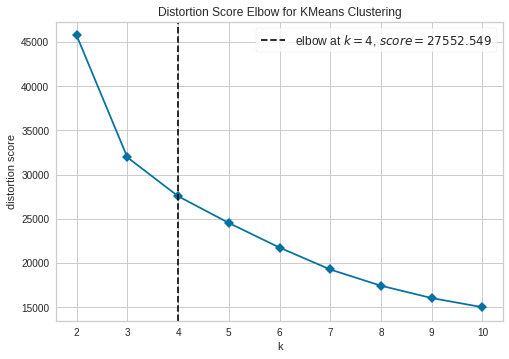

In [ ]:
plot_model(kmeans, plot = 'elbow')

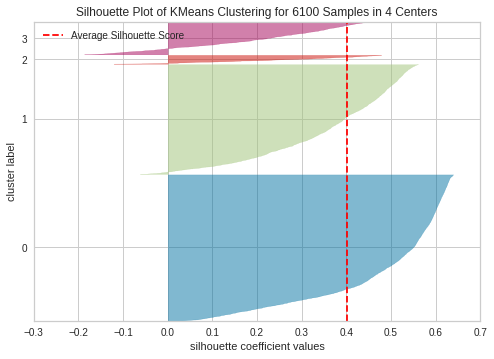

In [ ]:
plot_model(kmeans, plot = 'silhouette')
## https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [ ]:
plot_model(kmeans, plot = 'distribution') #to see size of clusters

In [ ]:
plot_model(kmeans, plot = 'distribution', feature = 'TotalSpend')

In [ ]:
plot_model(kmeans, plot = 'distribution', feature = 'total_days')

In [ ]:
#plot_model(kmeans, plot = 'distribution', feature = 'Percent_Weekday')
plot_model(kmeans, plot = 'distribution', feature = 'Frequecy_period')

In [ ]:
plot_model(kmeans, plot = 'distribution', feature = 'recency')

In [ ]:
#plot_model(kmeans, plot = 'distribution', feature = 'SHOP_WEEKDAY')

In [ ]:
plot_model(kmeans, plot = 'distribution', feature = 'TotalSKUs')

In [ ]:
plot_model(kmeans, plot = 'distribution', feature = 'avg_transection_per_month')

## Check importance feature By Classification model

In [ ]:
kmean_results = assign_model(kmeans)
kmean_results.tail()

CUST_CODE  TotalSpend  ...  Frequecy_period    Cluster
6095  CUST0000999593      453.58  ...            23.27  Cluster 3
6096  CUST0000999645      105.11  ...            67.27  Cluster 1
6097  CUST0000999654        5.86  ...             1.00  Cluster 0
6098  CUST0000999935      444.17  ...            26.43  Cluster 1
6099  CUST0000999936       17.67  ...           104.00  Cluster 1

[5 rows x 15 columns]

In [ ]:
from pycaret.classification import *

In [ ]:
clf1 = setup(data = kmean_results, 
             target = 'Cluster',
             numeric_imputation = 'mean',
             #categorical_features = ['SHOP_WEEKDAY'], 
             ignore_features = ['CUST_CODE','FirstDate', 'LastDate','month'],
             silent = True)

Description                                              Value
0                               session_id                                               2486
1                                   Target                                            Cluster
2                              Target Type                                         Multiclass
3                            Label Encoded  Cluster 0: 0, Cluster 1: 1, Cluster 2: 2, Clus...
4                            Original Data                                         (6100, 15)
5                           Missing Values                                              False
6                         Numeric Features                                                 10
7                     Categorical Features                                                  0
8                         Ordinal Features                                              False
9                High Cardinality Features                                              False
10                 High Cardinality Method                                               None
11                   Transformed Train Set                                         (4269, 10)
12                    Transformed Test Set                                         (1831, 10)
13                      Shuffle Train-Test                                               True
14                     Stratify Train-Test                                              False
15                          Fold Generator                                    StratifiedKFold
16                             Fold Number                                                 10
17                                CPU Jobs                                                 -1
18                                 Use GPU                                              False
19                          Log Experiment                                              False
20                         Experiment Name                                   clf-default-name
21                                     USI                                               edfa
22                         Imputation Type                                             simple
23          Iterative Imputation Iteration                                               None
24                         Numeric Imputer                                               mean
25      Iterative Imputation Numeric Model                                               None
26                     Categorical Imputer                                           constant
27  Iterative Imputation Categorical Model                                               None
28           Unknown Categoricals Handling                                     least_frequent
29                               Normalize                                              False
30                        Normalize Method                                               None
31                          Transformation                                              False
32                   Transformation Method                                               None
33                                     PCA                                              False
34                              PCA Method                                               None
35                          PCA Components                                               None
36                     Ignore Low Variance                                              False
37                     Combine Rare Levels                                              False
38                    Rare Level Threshold                                               None
39                         Numeric Binning                                              False
40                         Remove Outliers                                              False
41                      Outliers Threshold                                         

In [ ]:
compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
et                 Extra Trees Classifier    0.9881  0.9997  0.9790  0.9882   
lightgbm  Light Gradient Boosting Machine    0.9881  0.9997  0.9827  0.9881   
lr                    Logistic Regression    0.9857  0.9991  0.9787  0.9860   
gbc          Gradient Boosting Classifier    0.9857  0.9996  0.9730  0.9858   
rf               Random Forest Classifier    0.9829  0.9995  0.9725  0.9830   
knn                K Neighbors Classifier    0.9752  0.9953  0.9248  0.9752   
dt               Decision Tree Classifier    0.9745  0.9807  0.9568  0.9749   
lda          Linear Discriminant Analysis    0.9686  0.9980  0.9445  0.9692   
qda       Quadratic Discriminant Analysis    0.9403  0.9930  0.9222  0.9471   
nb                            Naive Bayes    0.9342  0.9923  0.9280  0.9440   
ada                  Ada Boost Classifier    0.9215  0.9624  0.7202  0.9030   
ridge                    Ridge Classifier    0.9178  0.0000  0.7696  0.9151   
svm                   SVM - Linear Kernel    0.9173  0.0000  0.8702  0.9322   

              F1   Kappa     MCC  TT (Sec)  
et        0.9880  0.9803  0.9804     0.544  
lightgbm  0.9880  0.9804  0.9804     0.495  
lr        0.9857  0.9765  0.9766     1.747  
gbc       0.9857  0.9765  0.9766     3.135  
rf        0.9828  0.9719  0.9719     0.819  
knn       0.9748  0.9590  0.9592     0.131  
dt        0.9745  0.9581  0.9582     0.038  
lda       0.9680  0.9479  0.9485     0.024  
qda       0.9423  0.9034  0.9042     0.022  
nb        0.9370  0.8941  0.8954     0.019  
ada       0.9102  0.8704  0.8723     0.276  
ridge     0.9106  0.8612  0.8639     0.017  
svm       0.9191  0.8669  0.8706     0.066

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=2486, verbose=0,
                     warm_start=False)

In [ ]:
dt  = create_model('dt')      

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9766  0.9807  0.9638  0.9767  0.9766  0.9615  0.9615
1       0.9719  0.9784  0.9661  0.9725  0.9720  0.9540  0.9542
2       0.9578  0.9691  0.9116  0.9578  0.9577  0.9307  0.9309
3       0.9789  0.9855  0.9259  0.9797  0.9787  0.9654  0.9655
4       0.9766  0.9815  0.9734  0.9771  0.9766  0.9615  0.9616
5       0.9930  0.9955  0.9738  0.9931  0.9930  0.9885  0.9885
6       0.9789  0.9828  0.9889  0.9796  0.9790  0.9655  0.9659
7       0.9719  0.9791  0.9576  0.9722  0.9720  0.9540  0.9540
8       0.9602  0.9678  0.9452  0.9606  0.9602  0.9346  0.9349
9       0.9789  0.9862  0.9620  0.9795  0.9791  0.9655  0.9656
Mean    0.9745  0.9807  0.9568  0.9749  0.9745  0.9581  0.9582
SD      0.0095  0.0077  0.0221  0.0096  0.0095  0.0156  0.0156

In [ ]:
tuned_dt= tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9719  0.9896  0.9443  0.9720  0.9718  0.9537  0.9537
1       0.9672  0.9846  0.9596  0.9672  0.9670  0.9459  0.9460
2       0.9696  0.9868  0.9303  0.9697  0.9693  0.9498  0.9499
3       0.9696  0.9898  0.9376  0.9710  0.9698  0.9502  0.9503
4       0.9696  0.9860  0.9295  0.9695  0.9695  0.9499  0.9500
5       0.9719  0.9871  0.9157  0.9721  0.9713  0.9536  0.9541
6       0.9696  0.9873  0.9787  0.9697  0.9696  0.9501  0.9502
7       0.9625  0.9851  0.9225  0.9625  0.9623  0.9383  0.9385
8       0.9602  0.9870  0.8841  0.9595  0.9598  0.9344  0.9345
9       0.9531  0.9854  0.9183  0.9531  0.9530  0.9230  0.9230
Mean    0.9665  0.9869  0.9321  0.9666  0.9663  0.9449  0.9450
SD      0.0058  0.0017  0.0245  0.0060  0.0058  0.0094  0.0095

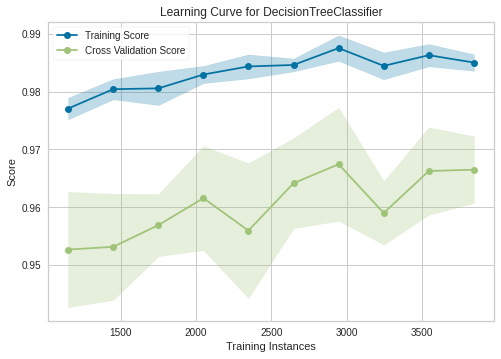

In [ ]:
plot_model(estimator = tuned_dt, plot = 'learning')

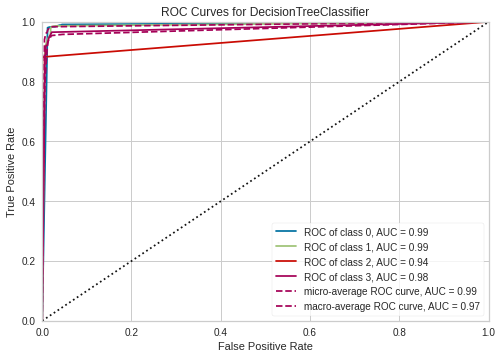

In [ ]:
plot_model(estimator = tuned_dt, plot = 'auc')

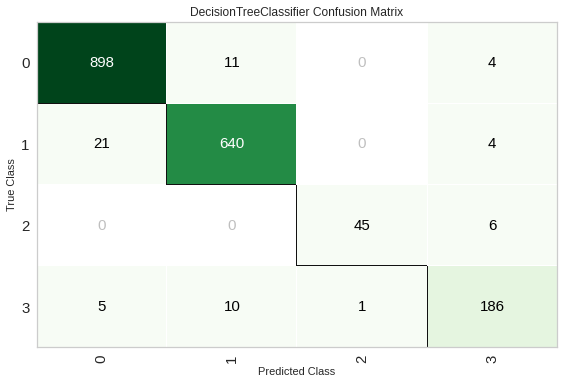

In [ ]:
plot_model(estimator =  tuned_dt, plot = 'confusion_matrix')

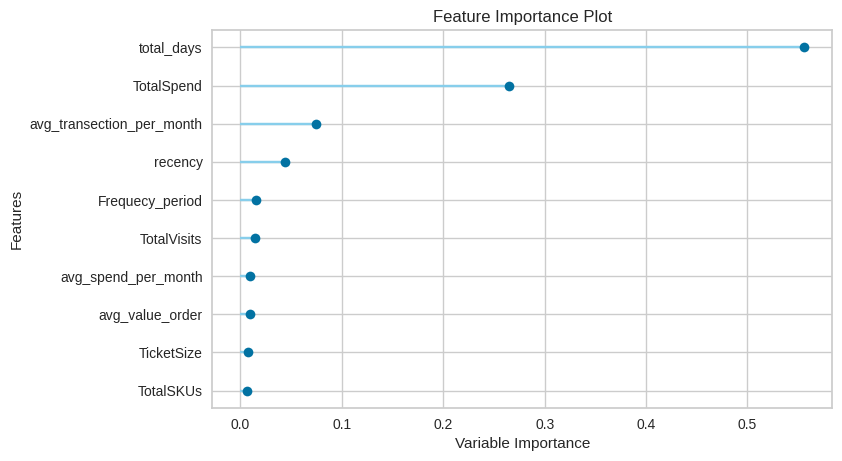

In [ ]:
plot_model(estimator = tuned_dt, plot = 'feature')

In [ ]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
!pip install git+https://github.com/slundberg/shap.git

  Cloning https://github.com/slundberg/shap.git to /tmp/pip-req-build-2i8lk3hu
  Running command git clone -q https://github.com/slundberg/shap.git /tmp/pip-req-build-2i8lk3hu
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


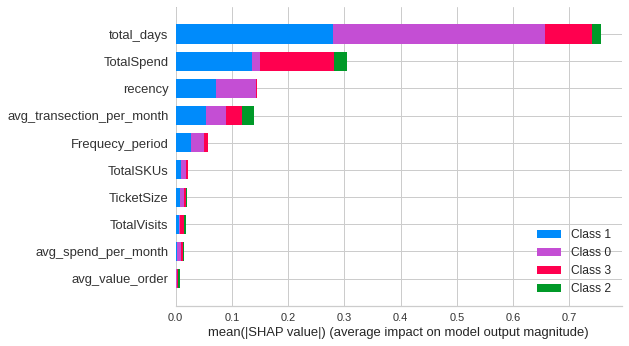

In [ ]:
interpret_model(tuned_dt)

## Analysis feature for clustering 

cluster0  ():  Low total spend , Lowest rencency and avg time between visit 
recommend :

1.   Run analysis on the cost vs revenue of offering promotions
2.   Churn prediction (Lead scoring)

cluster1  ():  Average total spend ,rencency and avg time between visit 
recommend :

1.   Daily promotion speacial
2.   Discount speacial products, BOGO

cluster2 (royal customer):  Highest total spend, Highest Rencency,  Lowest avg between visit
recommend : 
1.   New products
2.  promotion แนะนำเพื่อนเพิ่มได้รับส่วนลด





cluster3  ():  High total spend, High Rencency, Low avg between visit 
recommend :

1.   upsell 
2.   voucher เมื่อซื้อครบสินค้าในแต่ละเดือบครบตามจำนวนเงินที่กำหนด 





NameError: ignored